In [ ]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')
from numpy.linalg import inv
from numpy import random
import os
import scipy
from scipy import stats
from matplotlib import pyplot as plt
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
import pylab
from pylab import legend
from pylab import plot, show, title, xlabel, ylabel
from scipy.stats import binom
from scipy.stats import binom, poisson
from scipy.stats import expon
from scipy.stats import norm, t
import statsmodels
from statsmodels import stats
from statsmodels.stats import weightstats as ssw
from statsmodels import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp
from scipy.stats import f
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats import proportion as ssp
from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import chisquare
from scipy.stats import chi2_contingency
from statsmodels.stats.rates import test_poisson
from statsmodels.stats.rates import test_poisson_2indep
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
from scipy.stats import ttest_ind


In [ ]:
applicants = pd.read_csv('/content/drive/MyDrive/credit_risk_applicants.csv')
ploans = pd.read_csv('/content/drive/MyDrive/credit_risk_previous_loans.csv')
meta = pd.read_csv('/content/drive/MyDrive/credit_risk_metadata.csv',encoding='latin1')

DESCRIPTIVE ANALYSIS

In [ ]:
print(applicants.shape)
print(ploans.shape)
print(meta.shape)

(307511, 122)
(1670214, 37)
(160, 5)


In [ ]:
print(applicants.head())


   SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1     

In [ ]:
print(applicants.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB
None


In [ ]:
print(applicants.describe())

          SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05  

HANDLING MISSING VALUES

In [ ]:
null_applicants= applicants.isnull().sum().sort_values(ascending=False)
total_applicants = len(applicants)
null_applicants


,0
COMMONAREA_AVG,214865
COMMONAREA_MODE,214865
COMMONAREA_MEDI,214865
NONLIVINGAPARTMENTS_MEDI,213514
NONLIVINGAPARTMENTS_MODE,213514
NONLIVINGAPARTMENTS_AVG,213514
FONDKAPREMONT_MODE,210295
LIVINGAPARTMENTS_AVG,210199
LIVINGAPARTMENTS_MEDI,210199
LIVINGAPARTMENTS_MODE,210199


In [ ]:
missing_app = pd.DataFrame(null_applicants / total_applicants) * 100
missing_app=missing_app.reset_index()
missing_app.rename(columns={0:'pct'},inplace=True)
missing_app



,index,pct
0,COMMONAREA_AVG,69.872297
1,COMMONAREA_MODE,69.872297
2,COMMONAREA_MEDI,69.872297
3,NONLIVINGAPARTMENTS_MEDI,69.432963
4,NONLIVINGAPARTMENTS_MODE,69.432963
5,NONLIVINGAPARTMENTS_AVG,69.432963
6,FONDKAPREMONT_MODE,68.386172
7,LIVINGAPARTMENTS_AVG,68.354953
8,LIVINGAPARTMENTS_MEDI,68.354953
9,LIVINGAPARTMENTS_MODE,68.354953


In [ ]:
to_drop = missing_app['index'].iloc[np.where(missing_app['pct'] > 40)].tolist()
applicants.drop(columns = to_drop,inplace=True,errors='ignore')

In [ ]:
#again checking for the percentage of null values where null value percentage is greater than 30
null_percent = applicants.isnull().mean() * 100
null_percent[null_percent > 40]

,0


In [ ]:
#checking the percentage of null values
null_v = ploans.isnull().sum().sort_values(ascending=False)
missing_loans = pd.DataFrame(null_v/len(ploans))*100
missing_loans = missing_loans.reset_index()
missing_loans.rename(columns ={0:'pct'},inplace=True)
print(missing_loans.head())
to_drop_loans = missing_loans['index'].iloc[np.where(missing_loans['pct']>40)].tolist()
print(to_drop_loans)
ploans.drop(columns = to_drop_loans,inplace=True)
ploans.shape

                      index        pct
0  RATE_INTEREST_PRIVILEGED  99.643698
1     RATE_INTEREST_PRIMARY  99.643698
2          AMT_DOWN_PAYMENT  53.636480
3         RATE_DOWN_PAYMENT  53.636480
4           NAME_TYPE_SUITE  49.119754
['RATE_INTEREST_PRIVILEGED', 'RATE_INTEREST_PRIMARY', 'AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT', 'NAME_TYPE_SUITE', 'DAYS_TERMINATION', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'NFLAG_INSURED_ON_APPROVAL']


(1670214, 26)

In [ ]:
#again checking for the percentage of null values where null value percentage is greater than 30
null_pct = ploans.isnull().mean()*100
null_pct[null_pct>40]

,0


In [ ]:
#replacing null columns of applicants dataframe with median & mode
num_cols = applicants.select_dtypes(include=['int64', 'float64']).columns
cat_cols = applicants.select_dtypes(include=['object']).columns

In [ ]:
applicants[num_cols] = applicants[num_cols].fillna(applicants[num_cols].median())
applicants[cat_cols] = applicants[cat_cols].fillna(applicants[cat_cols].mode())

In [ ]:
#replacing null columns of previous loans dataframe with median and mode respectively
n_cols = ploans.select_dtypes(include=['int64','float64']).columns
c_cols = ploans.select_dtypes(include=['object']).columns

In [ ]:
ploans[n_cols] = ploans[n_cols].fillna(ploans[n_cols].median())
ploans[c_cols] = ploans[c_cols].fillna(ploans[c_cols].mode())

In [ ]:
mode = applicants['NAME_TYPE_SUITE'].mode()[0]
applicants['NAME_TYPE_SUITE'].fillna(mode, inplace=True)

In [ ]:
print(applicants.isnull().sum().sort_values(ascending=False))

OCCUPATION_TYPE                96391
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
SK_ID_CURR                         0
AMT_CREDIT                         0
AMT_ANNUITY                        0
NAME_TYPE_SUITE                    0
AMT_GOODS_PRICE                    0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
NAME_INCOME_TYPE                   0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
FLAG_MOBIL                         0
FLAG_EMP_PHONE                     0
FLAG_WORK_PHONE                    0
REGION_POPULATION_RELATIVE         0
FLAG_CONT_MOBILE                   0
FLAG_PHONE                         0
F

In [ ]:
mode1 = ploans['PRODUCT_COMBINATION'].mode()[0]
ploans['PRODUCT_COMBINATION'].fillna(mode1,inplace=True)


In [ ]:

ploans.isnull().sum().sort_values(ascending=False)

,0
SK_ID_PREV,0
SK_ID_CURR,0
NAME_CONTRACT_TYPE,0
AMT_ANNUITY,0
AMT_APPLICATION,0
AMT_CREDIT,0
AMT_GOODS_PRICE,0
WEEKDAY_APPR_PROCESS_START,0
HOUR_APPR_PROCESS_START,0
FLAG_LAST_APPL_PER_CONTRACT,0


In [ ]:
applicants['AGE_YEARS'] = -applicants['DAYS_BIRTH']/365.25

AS WE HAVE DAYS IN NEGATIVE WE HAVE TO CONVERT IT TO POSITIVE AND ALSO IN YEARS

In [ ]:
#print(applicants['DAYS_EMPLOYED'].sort_values(ascending=True))
applicants['DAYS_EMPLOYED'] = applicants['DAYS_EMPLOYED'].replace(365243, np.nan)

In [ ]:
applicants['YEARS_EMPLOYED'] = -applicants['DAYS_EMPLOYED'] / 365.25

In [ ]:
applicants['YEARS_REGISTRATION']= -applicants['DAYS_REGISTRATION']/365.25

In [ ]:
applicants['YEARS_ID_PUBLISH'] = -applicants['DAYS_ID_PUBLISH']/365.25

In [ ]:
applicants['YEARS_LAST_PHONE_CHANGED'] = applicants['DAYS_LAST_PHONE_CHANGE']

In [ ]:
applicants.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE_YEARS,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,YEARS_LAST_PHONE_CHANGED
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637.0,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,25.902806,1.744011,9.987680,5.804244,-1134.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188.0,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.535276,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,45.900068,3.252567,3.247091,0.796715,-828.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225.0,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,52.145106,0.616016,11.663244,6.929500,-815.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039.0,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,0.535276,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,52.032854,8.320329,26.921287,6.672142,-617.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038.0,-4311.0,-3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,0.535276,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,54.570842,8.317591,11.802875,9.467488,-1106.0


In [ ]:
ploans.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,SATURDAY,15,Y,1,XAP,Approved,-73,Cash through the bank,XAP,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,THURSDAY,11,Y,1,XNA,Approved,-164,XNA,XAP,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,TUESDAY,11,Y,1,XNA,Approved,-301,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,MONDAY,7,Y,1,XNA,Approved,-512,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,THURSDAY,9,Y,1,Repairs,Refused,-781,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high


Removing Outliers

In [ ]:
outlier_cols = [
    'AMT_INCOME_TOTAL',
    'AMT_CREDIT',
    'AMT_ANNUITY',
    'AMT_GOODS_PRICE',
    'AGE_YEARS',
    'YEARS_EMPLOYED',
    'YEARS_REGISTRATION',
    'YEARS_LAST_PHONE_CHANGED'
]
app_cleaned=applicants

In [ ]:
for i in outlier_cols:
    Q1 = app_cleaned[i].quantile(0.25)
    Q3 = app_cleaned[i].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    app_cleaned[i] = app_cleaned[i].clip(lower, upper)

In [ ]:
#ANNUITY_INCOME_RATIO = AMT_ANNUITY / AMT_INCOME_TOTAL

In [ ]:
applicants.shape

(307511, 78)

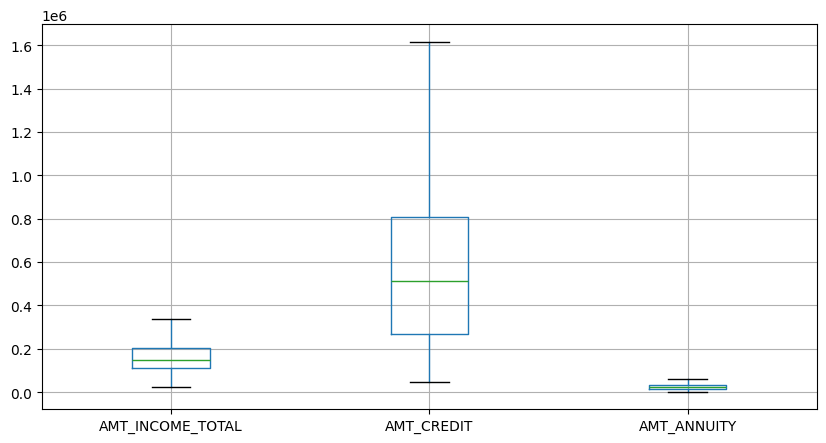

In [ ]:
#this represents that we have removed outliers
app_cleaned[['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY']].boxplot(figsize=(10,5))
plt.show()


# **Exploratory Data Analysis**

**Univariate analysis:**



DISTRIBUTION OF TOTAL INCOME OF APPLICANTS:

--As we can see the below graph is rightly skewed (the peak is on the left side)
We can analyse that most of the people who's income range from low to medium apply for credit card the most.

-- As the income increases the peak goes down the trend in the number of applicants decreases.

--Hence, we can say that most of the applicants belongs to the group of low to medium total income.

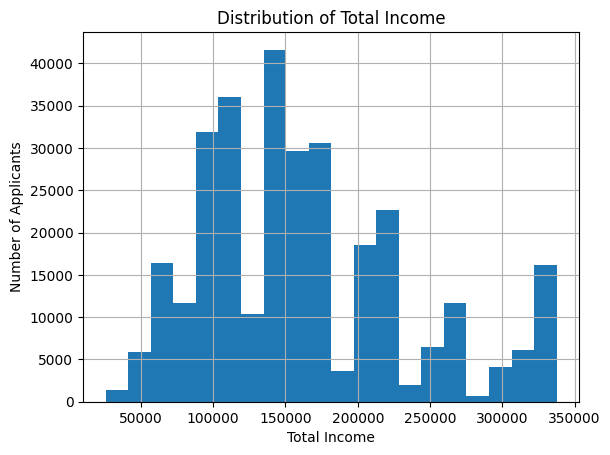

In [ ]:
#univariate analysis based on total income
app_cleaned['AMT_INCOME_TOTAL'].describe()
plt.figure()
plt.hist(app_cleaned['AMT_INCOME_TOTAL'], bins=20)
plt.title('Distribution of Total Income')
plt.xlabel('Total Income')
plt.ylabel('Number of Applicants')
plt.grid(True)
plt.show()

**************

---





DISTRIBUTION OF CREDIT CARD AMOUNT

-- As we can see the peak of bars is mostly on the left side, that means

-- Most applicants take moderate credit amounts, while very high-value loans are less frequent

statistical description of credit card amount of applicants: count    3.075110e+05
mean     5.923130e+05
std      3.803162e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      1.616625e+06
Name: AMT_CREDIT, dtype: float64


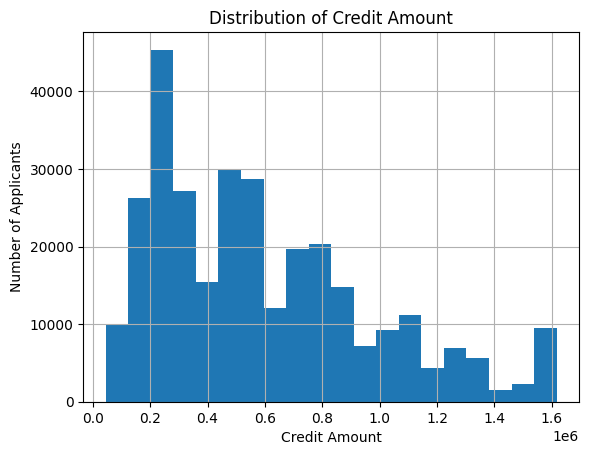

In [ ]:
print("statistical description of credit card amount of applicants:",app_cleaned['AMT_CREDIT'].describe())
plt.figure()
plt.hist(app_cleaned['AMT_CREDIT'], bins=20)
plt.title('Distribution of Credit Amount')
plt.xlabel('Credit Amount')
plt.ylabel('Number of Applicants')
plt.grid(True)
plt.show()


**************

---





DISTRIBUTION OF APPLICANT AGE

-- As we can interpret from the below graph very few young age and old age people apply for loan.

-- Most of the applicants belong to the working-age group (from 30 to 50)

statistical description of age column:
 count    307511.000000
mean         43.906900
std          11.947950
min          20.503765
25%          33.984942
50%          43.121150
75%          53.886379
max          69.073238
Name: AGE_YEARS, dtype: float64 

Graphical representation: 



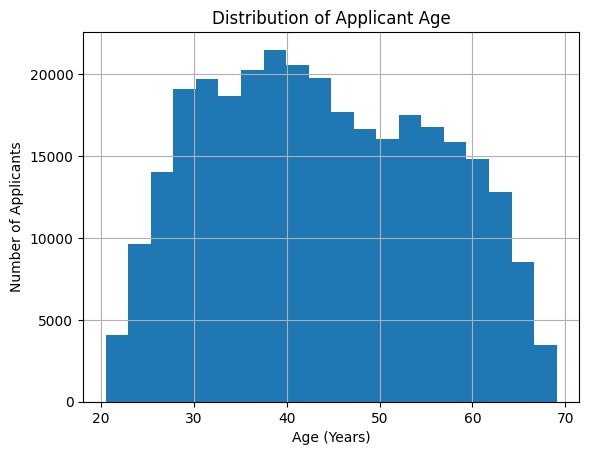

In [ ]:
print("statistical description of age column:\n",app_cleaned['AGE_YEARS'].describe(),'\n')
print("Graphical representation: \n")
plt.figure()
plt.hist(app_cleaned['AGE_YEARS'], bins=20)
plt.title('Distribution of Applicant Age')
plt.xlabel('Age (Years)')
plt.ylabel('Number of Applicants')
plt.grid(True)
plt.show()

**************

---





DISTRIBUTION OF ANNUITY (EMI)

-- The below graph shows how many people actually have monthly loan repayment

-- Very few people have EMI above ₹50,000

-- Most applicants have monthly EMI between ₹10,000 and ₹30,000.

-- The highest concentration of applicants is around ₹15,000–₹25,000 EMI.

-- Most people pay low to moderate EMI, and only a small number pay very high EMI.

statistical description of annuity amount:
 count    307511.000000
mean      26797.657150
std       13281.285661
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max       61704.000000
Name: AMT_ANNUITY, dtype: float64 

Graphical representation: 



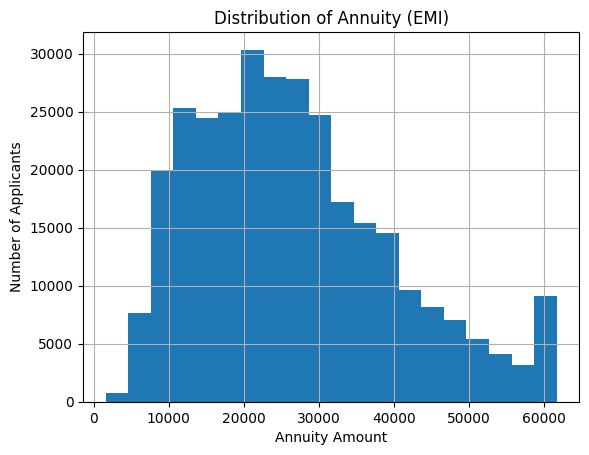

In [ ]:
print("statistical description of annuity amount:\n",app_cleaned['AMT_ANNUITY'].describe(),'\n')
print("Graphical representation: \n")
plt.figure()
plt.hist(app_cleaned['AMT_ANNUITY'], bins=20)
plt.title('Distribution of Annuity (EMI)')
plt.xlabel('Annuity Amount')
plt.ylabel('Number of Applicants')
plt.grid(True)
plt.show()

**************

---





DISTRIBUTION OF APPLICANTS BASED ON EDUCATION TYPES

-- Most applicants have “Secondary / secondary special” education.

-- The second largest group is applicants with Higher education.

-- Very few applicants belong to:

*   Incolplete higher education
*   Lower secondary
*   Acaedemic Degree





statistical analysis of education type(categorical):
 count                            307511
unique                                5
top       Secondary / secondary special
freq                             218391
Name: NAME_EDUCATION_TYPE, dtype: object 

Graphical Representation:



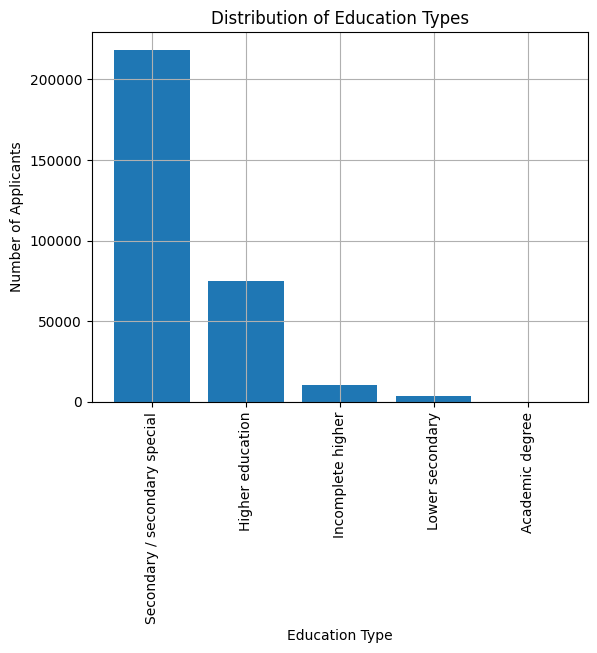

In [ ]:
print("statistical analysis of education type(categorical):\n",app_cleaned['NAME_EDUCATION_TYPE'].describe(),'\n')

education_counts = app_cleaned['NAME_EDUCATION_TYPE'].value_counts()

print("Graphical Representation:\n")
plt.figure()
plt.bar(education_counts.index, education_counts.values)
plt.title('Distribution of Education Types')
plt.xlabel('Education Type')
plt.ylabel('Number of Applicants')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

**************

---





DISTRIBUTION OF LOAN DEFAULT

-- The number of Non-Defaulters (0) is much higher than the number of Defaulters (1).

-- Most applicants repay their loans successfully.

-- The bank’s overall loan performance is good, since most customers repay.

-- The small defaulter group still causes major financial risk.

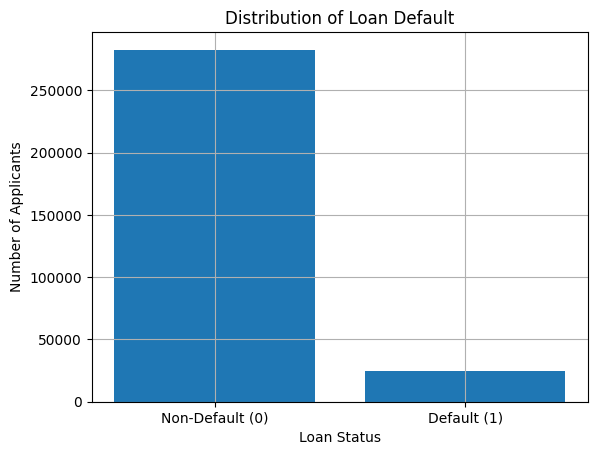

In [ ]:
#target 0 = loan paid
#target 1 = not paid
target_counts = app_cleaned['TARGET'].value_counts()

plt.figure()
plt.bar(['Non-Default (0)', 'Default (1)'], target_counts.values)
plt.title('Distribution of Loan Default')
plt.xlabel('Loan Status')
plt.ylabel('Number of Applicants')
plt.grid(True)
plt.show()

# ***BI-VARIATE ANALYSIS***

CREDIT CARD AMOUNT vs LOAN DEFAULT

-- The median credit amount of defaulters (1) and non-defaulters (0) is almost the same.

-- Both groups borrow similar loan amounts on average.

-- Default risk increases when:

*   High credit is combined with low income
*   High credit is combined with high EMI





Graphical representation: 



<Figure size 640x480 with 0 Axes>

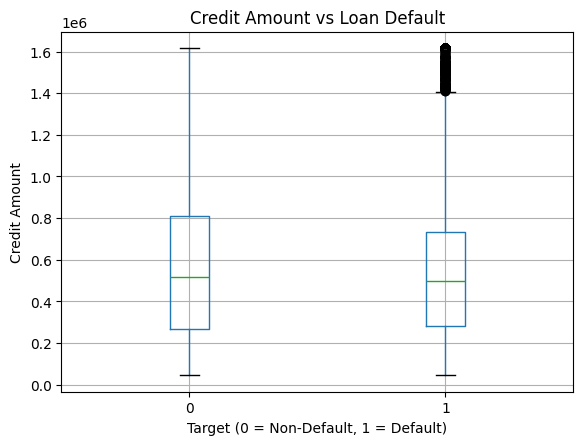

In [ ]:
print("Graphical representation: \n")
plt.figure()
app_cleaned.boxplot(column='AMT_CREDIT', by='TARGET')
plt.title('Credit Amount vs Loan Default')
plt.suptitle('')
plt.xlabel('Target (0 = Non-Default, 1 = Default)')
plt.ylabel('Credit Amount')
plt.grid(True)
plt.show()

INCOME GROUP vs LOAN DEFAULT

--Low income group has the highest number of defaulters.

-- As income increases, the number of defaulters generally decreases.

<Figure size 640x480 with 0 Axes>

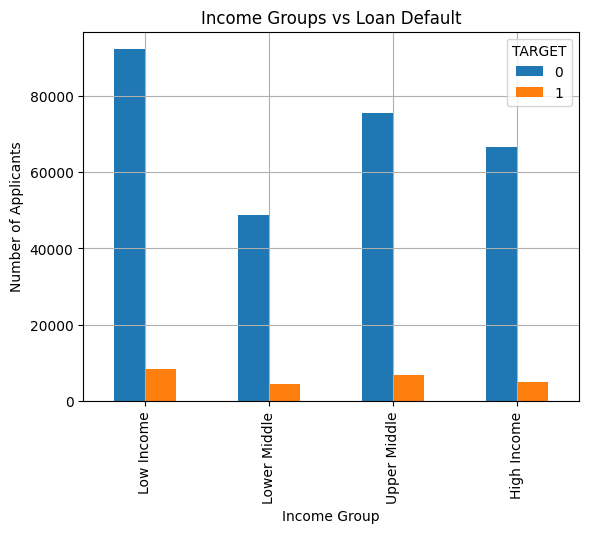

In [ ]:
app_cleaned['INCOME_GROUP'] = pd.qcut(app_cleaned['AMT_INCOME_TOTAL'],q=4,labels=['Low Income', 'Lower Middle', 'Upper Middle', 'High Income'])
income_target = pd.crosstab(app_cleaned['INCOME_GROUP'], app_cleaned['TARGET'])

plt.figure()
income_target.plot(kind='bar')
plt.title('Income Groups vs Loan Default')
plt.xlabel('Income Group')
plt.ylabel('Number of Applicants')
plt.grid(True)
plt.show()

HOUSING TYPE vs LOAN DEFAULT

-- Most applicants live in House / apartment
*  Most non-defaulters also come from this group.
*  Most defaulters also appear here because this is the largest group overall.

-- Office apartments and co-op apartments have very few applicants and very few defaulters.




<Figure size 640x480 with 0 Axes>

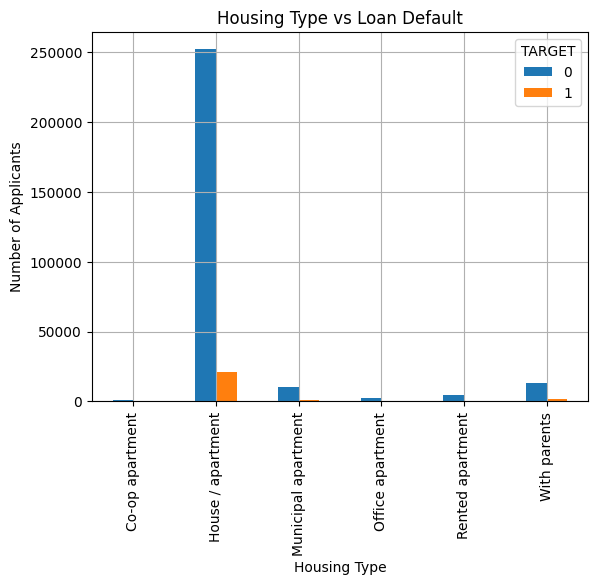

In [ ]:
housing_target = pd.crosstab(app_cleaned['NAME_HOUSING_TYPE'], app_cleaned['TARGET'])

plt.figure()
housing_target.plot(kind='bar')
plt.title('Housing Type vs Loan Default')
plt.xlabel('Housing Type')
plt.ylabel('Number of Applicants')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()


OCCUPATION TYPE vs LOAN DEFAULT

-- Laborers have the highest number of defaulters.

-- Sales staff and Core staff also show a notable number of defaulters, mainly because they form a large part of the workforce.

-- Drivers, Security staff, and Cooking staff show moderate default counts.

-- Managers, IT staff, and High-skill technical staff show very low default counts.

-- Secretaries, Realty agents, and Private service staff have very small default numbers due to smaller population size.

<Figure size 640x480 with 0 Axes>

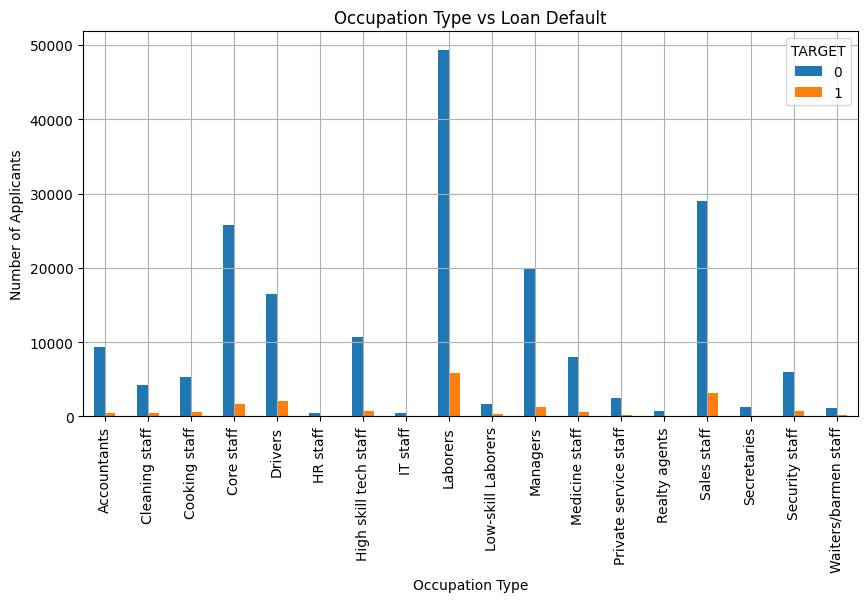

In [ ]:
occupation_target = pd.crosstab(app_cleaned['OCCUPATION_TYPE'], app_cleaned['TARGET'])
app_cleaned['OCCUPATION_TYPE']
plt.figure()
occupation_target.plot(kind='bar', figsize=(10,5))
plt.title('Occupation Type vs Loan Default')
plt.xlabel('Occupation Type')
plt.ylabel('Number of Applicants')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()


EXTERNAL SOURCES 2 vs LOAN DEFAULT

-- People who did not default usually have higher external scores.

-- People who defaulted mostly have lower scores.

-- Many very low scores belong to defaulters.

-- This means lower external score = higher chance of loan default.

<Figure size 640x480 with 0 Axes>

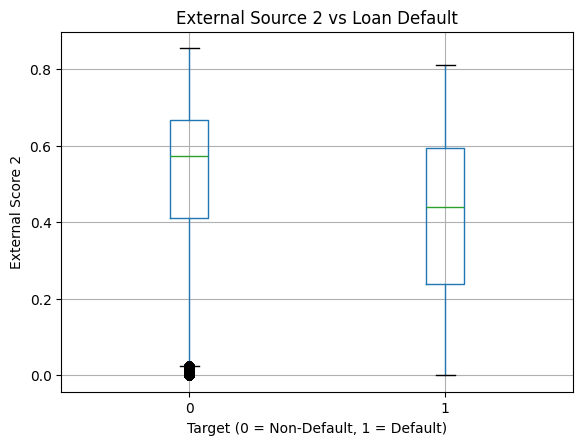

In [ ]:
plt.figure()
app_cleaned.boxplot(column='EXT_SOURCE_2', by='TARGET')
plt.title('External Source 2 vs Loan Default')
plt.suptitle('')
plt.xlabel('Target (0 = Non-Default, 1 = Default)')
plt.ylabel('External Score 2')
plt.grid(True)
plt.show()


EXTERNAL SOURCES 3 vs LOAN DEFAULT

<Figure size 640x480 with 0 Axes>

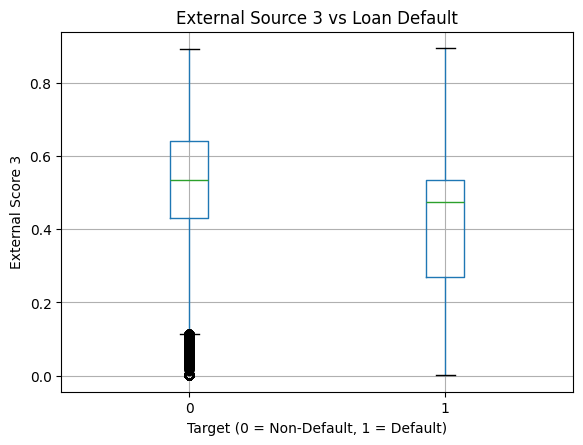

In [ ]:
plt.figure()
app_cleaned.boxplot(column='EXT_SOURCE_3', by='TARGET')
plt.title('External Source 3 vs Loan Default')
plt.suptitle('')
plt.xlabel('Target (0 = Non-Default, 1 = Default)')
plt.ylabel('External Score 3')
plt.grid(True)
plt.show()

# **MULTI-VARIATE ANALYSIS**

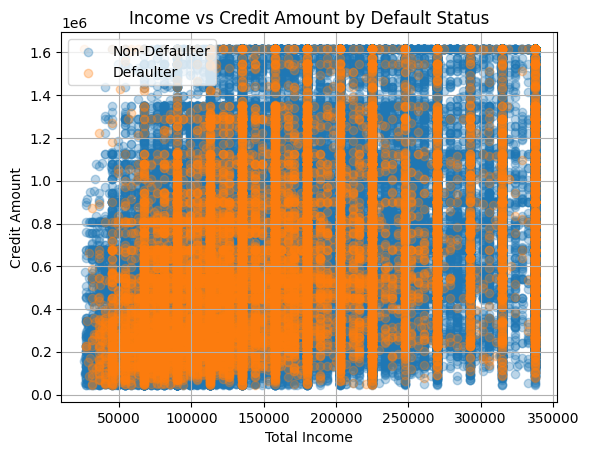

In [ ]:
non_defaulters = app_cleaned[app_cleaned['TARGET'] == 0]
defaulters = app_cleaned[app_cleaned['TARGET'] == 1]

plt.figure()
plt.scatter(non_defaulters['AMT_INCOME_TOTAL'], non_defaulters['AMT_CREDIT'], label='Non-Defaulter', alpha=0.3)
plt.scatter(defaulters['AMT_INCOME_TOTAL'], defaulters['AMT_CREDIT'], label='Defaulter', alpha=0.3)

plt.title('Income vs Credit Amount by Default Status')
plt.xlabel('Total Income')
plt.ylabel('Credit Amount')
plt.legend()
plt.grid(True)
plt.show()

<Figure size 640x480 with 0 Axes>

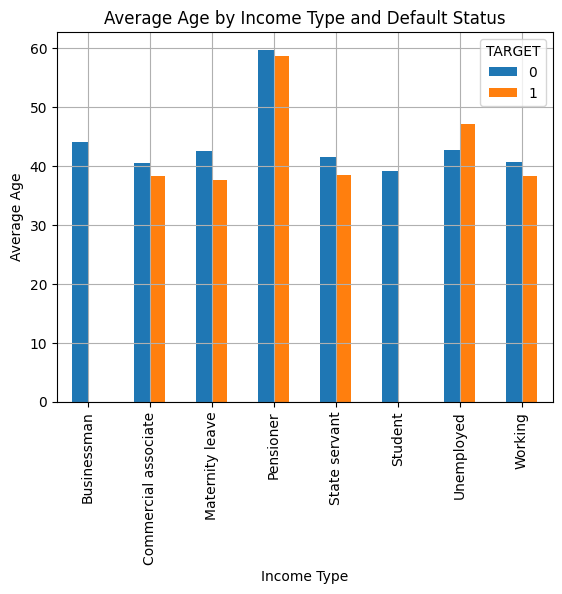

In [ ]:
age_income_target = app_cleaned.groupby(['NAME_INCOME_TYPE', 'TARGET'])['AGE_YEARS'].mean().unstack()

plt.figure()
age_income_target.plot(kind='bar')
plt.title('Average Age by Income Type and Default Status')
plt.xlabel('Income Type')
plt.ylabel('Average Age')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()


<Figure size 640x480 with 0 Axes>

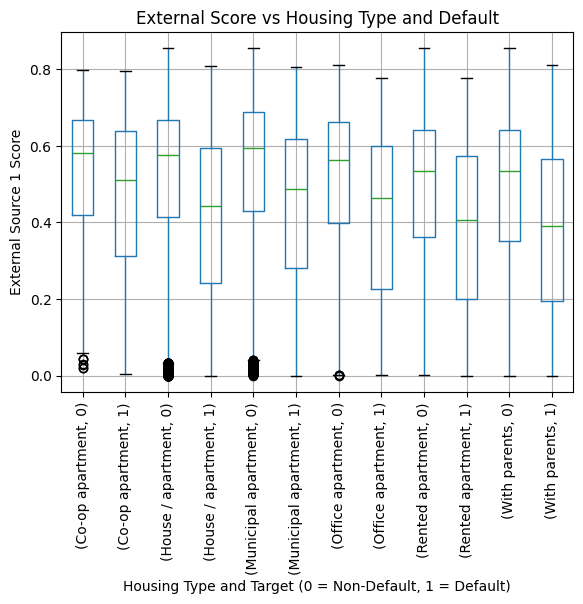

In [ ]:
plt.figure()
app_cleaned.boxplot(column='EXT_SOURCE_2', by=['NAME_HOUSING_TYPE', 'TARGET'])
plt.title('External Score vs Housing Type and Default')
plt.suptitle('')
plt.xlabel('Housing Type and Target (0 = Non-Default, 1 = Default)')
plt.ylabel('External Source 1 Score')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()


<Figure size 640x480 with 0 Axes>

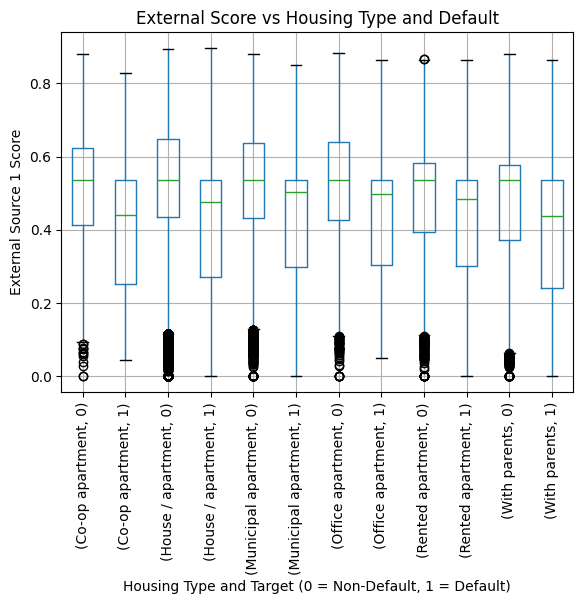

In [ ]:
plt.figure()
app_cleaned.boxplot(column='EXT_SOURCE_3', by=['NAME_HOUSING_TYPE', 'TARGET'])
plt.title('External Score vs Housing Type and Default')
plt.suptitle('')
plt.xlabel('Housing Type and Target (0 = Non-Default, 1 = Default)')
plt.ylabel('External Source 1 Score')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

In [ ]:
num_df = app_cleaned.select_dtypes(include='number')
corr_matrix = num_df.corr()
corr_matrix
#corr_matrix['TARGET'].sort_values(ascending=False)
corr_with_target = corr_matrix['TARGET'].sort_values(ascending=False)


In [ ]:
important_cols = [
    'TARGET',
    'AMT_INCOME_TOTAL',
    'AMT_CREDIT',
    'AMT_ANNUITY',
    'AMT_GOODS_PRICE',
    'AGE_YEARS',
    'YEARS_EMPLOYED',
    'YEARS_REGISTRATION',
    'EXT_SOURCE_2',
    'EXT_SOURCE_3'
]

corr_clean = app_cleaned[important_cols].corr()

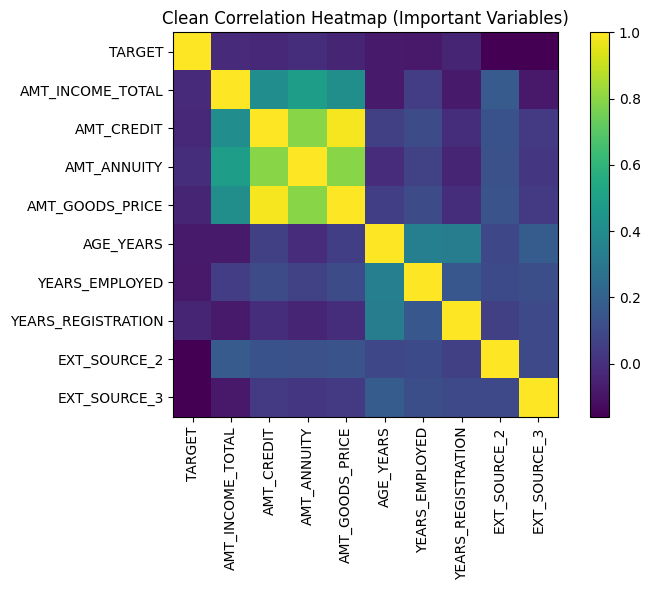

In [ ]:
plt.figure(figsize=(8, 6))
plt.imshow(corr_clean)
plt.colorbar()
plt.xticks(range(len(corr_clean.columns)), corr_clean.columns, rotation=90)
plt.yticks(range(len(corr_clean.columns)), corr_clean.columns)
plt.title('Clean Correlation Heatmap (Important Variables)')
plt.tight_layout()
plt.show()

# ***HYPOTHESIS TESTING***

1. Do defaulters have significantly lower income than non-defaulters?

H₀ (Null): Mean income of defaulters - Mean income of non-defaulters > 0   

H₁ (Alternate): Mean income of defaulters - Mean income of non-defaulters < 0  


Income = continuous numeric

Target = two independent groups

Hence, We will use two sample t test

In [ ]:
income_def = app_cleaned[app_cleaned['TARGET'] == 1]['AMT_INCOME_TOTAL']
income_nondef = app_cleaned[app_cleaned['TARGET'] == 0]['AMT_INCOME_TOTAL']
t_stat, p_val = ttest_ind(income_def, income_nondef)

t_stat, p_val

print(f"""Since the p-value ({p_val}) < 0.05, we reject the Null Hypothesis.
- This means that the Alternative Hypothesis is accepted.
- Conclusion: There is a statistically significant difference between the mean income of defaulters and non-defaulters.
- Hence, income is a statistically significant factor influencing loan default.""")


Since the p-value (1.2598127886361472e-35) < 0.05, we reject the Null Hypothesis.
- This means that the Alternative Hypothesis is accepted.
- Conclusion: There is a statistically significant difference between the mean income of defaulters and non-defaulters.
- Hence, income is a statistically significant factor influencing loan default.


Is the default rate different across genders?

H₀ (Null): Gender and default are independent

H₁ (Alternate): Gender and default are dependent

Target = categorical data

Gender = categorical data

Hence, We will use chi square (test of independence)

In [ ]:
gender_table = pd.crosstab(app_cleaned['CODE_GENDER'], app_cleaned['TARGET'])
chi2, p, dof, expected = chi2_contingency(gender_table)

print(f"""Since the p-value ({p}) < 0.05, we reject the Null Hypothesis.
- This means that the Alternative Hypothesis is accepted.
- Conclusion: Gender and loan default are statistically dependent.
- This indicates that the default rate is significantly different across genders.
- Hence, gender is a statistically significant demographic factor influencing loan default.""")


Since the p-value (1.1290217848908289e-200) < 0.05, we reject the Null Hypothesis.
- This means that the Alternative Hypothesis is accepted.
- Conclusion: Gender and loan default are statistically dependent.
- This indicates that the default rate is significantly different across genders.
- Hence, gender is a statistically significant demographic factor influencing loan default.


Are education level and default correlated?

H₀: Education and default are independent

H₁: Education and default are

both the data are categorical hence we use chi square degree of association test

In [ ]:
edu_table = pd.crosstab(app_cleaned['NAME_EDUCATION_TYPE'], app_cleaned['TARGET'])

chi2, p, dof, expected = chi2_contingency(edu_table)

chi2, p
print(f"""Since the p-value ({p}) < 0.05, we reject the Null Hypothesis.
- This means that the Alternative Hypothesis is accepted.
- Conclusion: Education level and loan default are statistically associated.
- This indicates that default behavior varies across different education levels.
- Hence, education level is a statistically significant factor influencing loan default.""")


Since the p-value (2.4476812052198174e-219) < 0.05, we reject the Null Hypothesis.
- This means that the Alternative Hypothesis is accepted.
- Conclusion: Education level and loan default are statistically associated.
- This indicates that default behavior varies across different education levels.
- Hence, education level is a statistically significant factor influencing loan default.


Is the company’s default rate higher than the industry benchmark?

Suppose, the industry benchmark rate is 5%

H₀: Company default rate ≤ Industry rate

H₁: Company default rate > Industry rate

In [ ]:
z_stat, p_val = proportions_ztest(app_cleaned['TARGET'].sum(),len(app_cleaned),0.05)
z_stat,p_val

print(f"""Since the p-value ({p_val}) < 0.05, we reject the Null Hypothesis.
- This means that the Alternative Hypothesis is accepted.
- Conclusion: The company’s default rate is significantly higher than the industry benchmark default rate.
- This indicates that the company is exposed to higher-than-average credit risk.
- Hence, immediate strengthening of credit approval and monitoring policies is required to reduce default risk.""")


Since the p-value (0.0) < 0.05, we reject the Null Hypothesis.
- This means that the Alternative Hypothesis is accepted.
- Conclusion: The company’s default rate is significantly higher than the industry benchmark default rate.
- This indicates that the company is exposed to higher-than-average credit risk.
- Hence, immediate strengthening of credit approval and monitoring policies is required to reduce default risk.
